In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='drive/My Drive/'

In [9]:
# Importing the dataset
from __future__ import division, print_function, unicode_literals
import pandas as pd
Rcancer=pd.read_csv(path+"/breast-cancer-wisconsin.csv", sep=",", header=None, 
                     names=["Sample code number", "Clump Thickness", 
                            "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                            "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei" ,
                            "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"])
pd.DataFrame.count(Rcancer)

Sample code number             699
Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Class                          699
dtype: int64

In [10]:
#delete the missing value
Rcancer=Rcancer.replace(to_replace="?", value=np.nan)
cancer=Rcancer.dropna()
pd.DataFrame.count(cancer)

Sample code number             683
Clump Thickness                683
Uniformity of Cell Size        683
Uniformity of Cell Shape       683
Marginal Adhesion              683
Single Epithelial Cell Size    683
Bare Nuclei                    683
Bland Chromatin                683
Normal Nucleoli                683
Mitoses                        683
Class                          683
dtype: int64

In [11]:
cancer.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
X=pd.DataFrame(cancer, columns= ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                            "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei" ,
                            "Bland Chromatin", "Normal Nucleoli", "Mitoses"])
y = pd.DataFrame(cancer, columns = ["Class"])

# Split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)


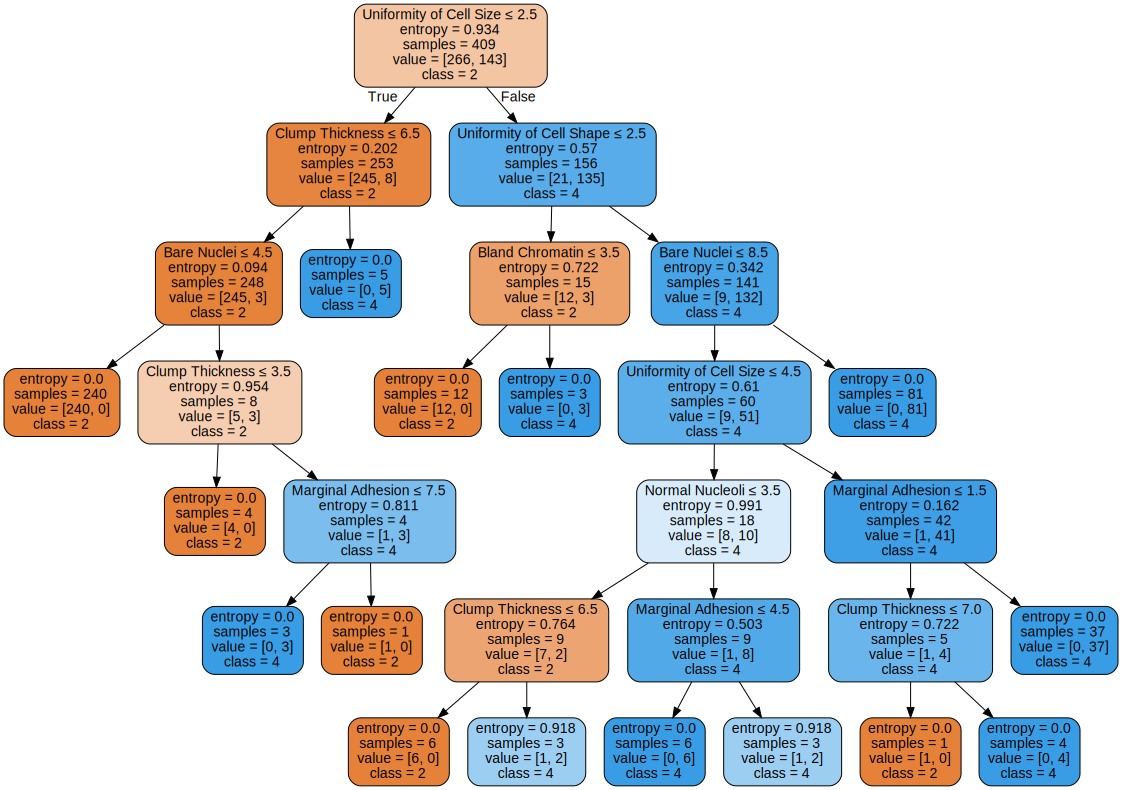

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 


# Information gain
clf_infoG = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf_infoG = clf_infoG.fit(X_train, y_train)
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(clf_infoG, out_file= None, 
                                feature_names=feature_names,
                                class_names='24',
                                filled=True, rounded=True,  
                                special_characters=True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph

In [14]:
#model evaluation
y_pred_infoG = clf_infoG.predict(X_test)               
infoG_matrix = confusion_matrix(y_test, y_pred_infoG)
print (infoG_matrix) 

print(classification_report(y_test, y_pred_infoG, target_names=["benign", "malignant"]))

[[167  11]
 [  5  91]]
              precision    recall  f1-score   support

      benign       0.97      0.94      0.95       178
   malignant       0.89      0.95      0.92        96

    accuracy                           0.94       274
   macro avg       0.93      0.94      0.94       274
weighted avg       0.94      0.94      0.94       274



In [15]:
print("Accuracy:",accuracy_score(y_test, y_pred_infoG))

Accuracy: 0.9416058394160584


In [16]:
print("Accuracy:",accuracy_score(y_test, y_pred_infoG)*100)

Accuracy: 94.16058394160584
